# 课后作业
王鸿洁

# 题目一： 
下载并用pandas导入sz50.xlsx的所有股票，索引设置为datetime，将所有股票的keys打印出来。
输出如下：


In [5]:
import pandas as pd
data = pd.read_excel('D:\sz50.xlsx', sheetname=None, index_col='datetime')
print(data.keys())

odict_keys(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG', '600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG'])


# 题目二：
读取data里的600036这只股票的DataFrame,将其收盘价转换成用Numpy的Array格式，并用talib计算10日均线值，返回ndarray的最后五个值
输出如下：


In [6]:
import talib as ta
MA = ta.MA(data['600036.XSHG'].close.values,10)
print(type(MA))
print(MA[-5:])

<class 'numpy.ndarray'>
[ 108.35   108.741  109.176  110.102  111.666]


# 题目三：
将MA的ndarray数据转换成Series格式，并将价格和MA值用Matplotlib展示出来
输出如下：


In [7]:
MA_Series = pd.Series(MA,index=data['600036.XSHG'].index)

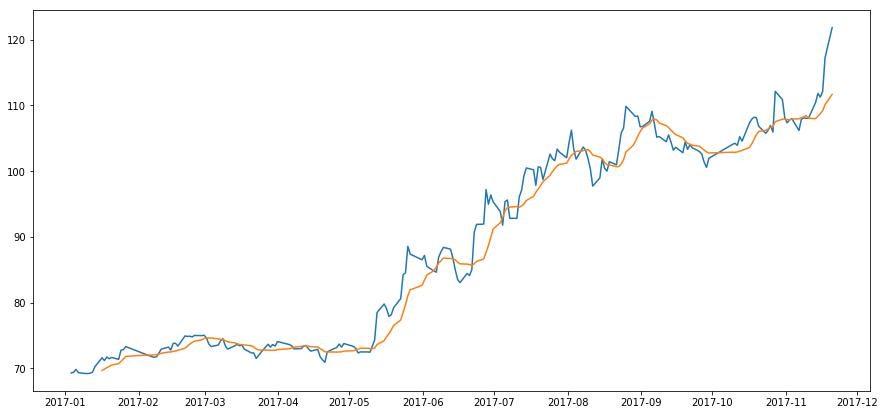

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.plot(data['600036.XSHG'].close)
plt.plot(MA_Series)
plt.show()

# 题目四：
用talib计算50只股票的周期为5的ROCR100，生成Dataframe，并将前5只股票的 ROCR100（参数timeperiod=20）用一张图显示出来。
输出如下：


In [9]:
stocks = pd.Panel({s: pd.read_excel('D:\sz50.xlsx', sheetname=s, index_col='datetime') 
                   for s in range(5)})

In [10]:
ROCR100 = pd.DataFrame({item: ta.ROCR100(value.values) for item, value in stocks.minor_xs('close').iteritems()}, index = stocks.minor_xs('close').index)
ROCR100.columns=['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG']

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


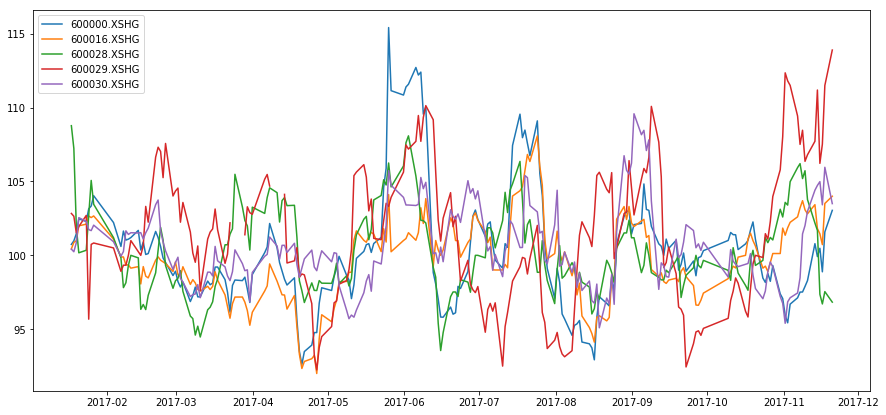

In [11]:
plt.figure(figsize=(15,7))
plt.plot(ROCR100.ix[:,0:5])
plt.legend(ROCR100.ix[:,0:5].columns)
plt.show()

# 题目五：
用Panel来计算50只股票的MACD并且输出MACD的Panel的MultiIndex格式
输出如下：


In [18]:
data_dict = {}
for s in data.keys():
    if s != '600485.XSHG':
        stock =  pd.read_excel('D:\sz50.xlsx',sheetname=s, index_col='datetime')
        data_dict[s] = stock.loc['2017-01-03':'2017-11-20']
PN = pd.Panel(data_dict)

In [19]:
import talib.abstract as ta

df_ma = pd.DataFrame({name: ta.MA(value, 5) for name, value in PN.iteritems()})
pn_macd = pd.Panel({name: ta.MACD(value) for name, value in PN.iteritems()})
df_macd = pn_macd.transpose(2,1,0).to_frame().head()
print(df_macd)

                                     macd  macdsignal  macdhist
datetime            minor                                      
2017-02-24 15:00:00 600000.XSHG  0.871114    1.197907 -0.326792
                    600016.XSHG -0.007077    0.265328 -0.272405
                    600028.XSHG  0.028081    0.052015 -0.023934
                    600029.XSHG  0.221787    0.132200  0.089587
                    600030.XSHG  0.602873    0.620235 -0.017362
